## Sketches to image generation using GANs

### Steps:

**1.Data Collection**

http://mmlab.ie.cuhk.edu.hk/archive/facesketch.html

**2.Defining Paths**

**3.Data Preprocessing**

**4.Defining 3 key Models:**

  - Generator

  - Discriminator

  - Combined

**5.Setting up losses and optimizers**

**6.Training the model**

**7.Testing the trained model**



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

## Bringing the data in and Setting up the paths

In [ ]:
# Define paths to directories containing train and test photos and sketches
path_to_train_photos = '/content/gdrive/MyDrive/Dataset/train/train_photo/'
path_to_test_photos = '/content/gdrive/MyDrive/Dataset/test/test_photo/'
path_to_train_sketches = '/content/gdrive/MyDrive/Dataset/train/train_sketch/'
path_to_test_sketches = '/content/gdrive/MyDrive/Dataset/test/test_sketch/'

# Import the os module for directory operations
import os

# Create lists containing file paths for train photos and train sketches
train_photos = [path_to_train_photos + i for i in os.listdir(path_to_train_photos)]
train_sketches = [path_to_train_sketches + i for i in os.listdir(path_to_train_sketches)]

# Create lists containing file paths for test photos and test sketches
test_photos = [path_to_test_photos + i for i in os.listdir(path_to_test_photos)]
test_sketches = [path_to_test_sketches + i for i in os.listdir(path_to_test_sketches)]

# Combine train and test photos into a single list
photos = train_photos + test_photos

# Combine train and test sketches into a single list
sketches = train_sketches + test_sketches


## Processing the images and Creating array of The sketches and photos

In [ ]:
import keras
from keras.utils import load_img, img_to_array
import numpy as np

# Initialize empty lists to store arrays of sketches and photos
sketches_array = []
photos_array = []

# Loop through the list of photo file paths
for i in range(len(photos)):
    # Load sketch image and convert it to array
    sketch_path = sketches[i]
    loaded_sketch = load_img(sketch_path, target_size=(128, 128, 3))
    loaded_sketch = img_to_array(loaded_sketch)
    sketches_array.append(loaded_sketch)

    # Load photo image and convert it to array
    photo_path = photos[i]
    loaded_photo = load_img(photo_path, target_size=(128, 128, 3))
    loaded_photo = img_to_array(loaded_photo)
    photos_array.append(loaded_photo)

# Convert lists of arrays into numpy arrays
sketches_array = np.array(sketches_array)
photos_array = np.array(photos_array)

# Convert arrays to float32 type
sketches_array = sketches_array.astype('float32')
photos_array = photos_array.astype('float32')

# Normalize pixel values to the range [-1, 1]
sketches_array = (sketches_array.astype(np.float32) - 127.5) / 127.5
photos_array = (photos_array.astype(np.float32) - 127.5) / 127.5


In [ ]:
# Checking the output of the input images
print(sketches_array[0])

print(photos_array[0])

#We used conditional GANs

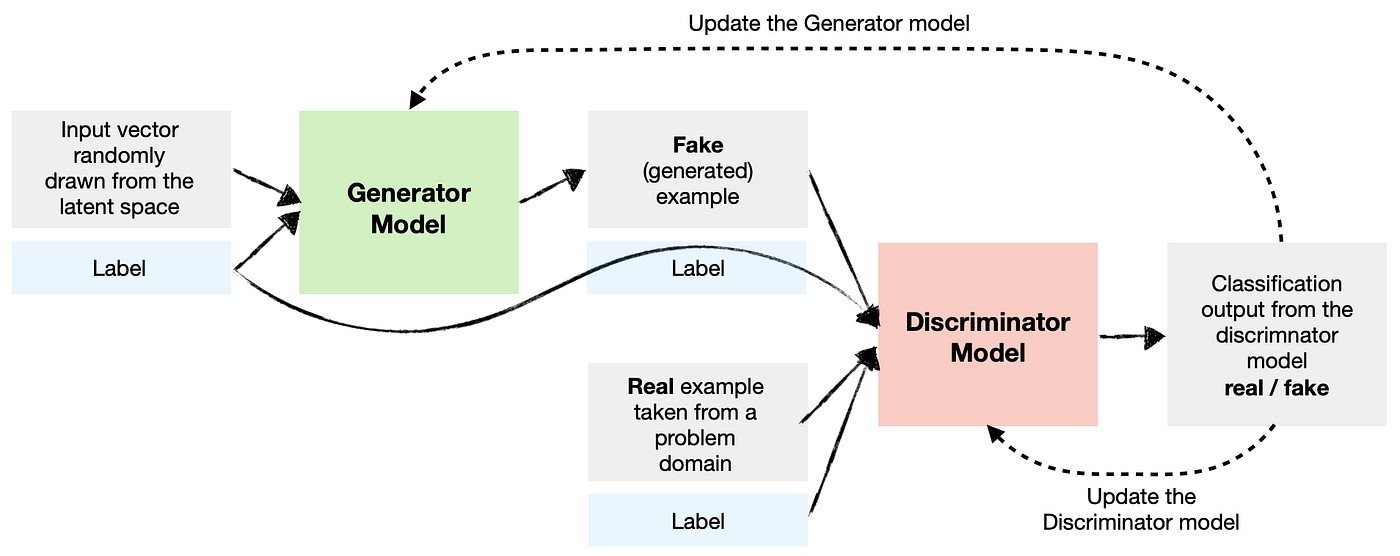

## Building the Generator Which will Generate images

In [ ]:
#Edited Generator for 128*128

from keras.layers import Input, Conv2D, Activation, Conv2DTranspose, BatchNormalization
from keras.models import Model
import tensorflow as tf

def generator():
    input_layer = Input((128, 128, 3))

    # Downsample layers
    conv1_layer = Conv2D(32, (7, 7), strides=(1, 1), padding='same')(input_layer)
    conv1_layer = BatchNormalization()(conv1_layer)
    conv1_layer = Activation('relu')(conv1_layer)

    conv2_layer = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(conv1_layer)
    conv2_layer = BatchNormalization()(conv2_layer)
    conv2_layer = Activation('relu')(conv2_layer)

    conv3_layer = Conv2D(128, (3, 3), strides=(2, 2), padding="same")(conv2_layer)
    conv3_layer = BatchNormalization()(conv3_layer)
    conv3_layer = Activation('relu')(conv3_layer)

    # Residual blocks
    b1=Conv2D(128,(3,3),padding="same")(conv3_layer)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block1 = tf.keras.layers.add([b1,b2])

    b1=Conv2D(128,(3,3),padding="same")(block1)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block2 = tf.keras.layers.add([b1,b2])

    b1=Conv2D(128,(3,3),padding="same")(block2)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block3 = tf.keras.layers.add([b1,b2])

    b1=Conv2D(128,(3,3),padding="same")(block3)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block4 = tf.keras.layers.add([b1,b2])

    b1=Conv2D(128,(3,3),padding="same")(block4)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block5 = tf.keras.layers.add([b1,b2])

    b1=Conv2D(128,(3,3),padding="same")(block5)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block6 = tf.keras.layers.add([b1,b2])


    # Upsample layers
    transpose1 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(block6)
    transpose1 = BatchNormalization()(transpose1)
    transpose1 = Activation('relu')(transpose1)

    transpose2 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(transpose1)
    transpose2 = BatchNormalization()(transpose2)
    transpose2 = Activation('relu')(transpose2)

    # Output layer
    output_layer = Conv2D(3, (3, 3), strides=(1, 1), padding='same', activation='relu')(transpose2)

    return Model(inputs=[input_layer], outputs=[output_layer])

# Create the generator model
generator_model = generator()

# Display model summary

generator_model.summary()



In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=generator_model , show_shapes="true")

In [ ]:
from keras.layers import Input, Conv2D, Activation, BatchNormalization, Flatten, Dense, LeakyReLU
from keras.models import Model

def discriminator():
    # Define input layer
    input_layer = Input((128, 128, 3))

    # First convolutional layer
    conv1_layer = Conv2D(64, (4, 4), strides=(2, 2))(input_layer)
    conv1_layer = Activation(LeakyReLU(alpha=0.2))(conv1_layer)

    # Second convolutional layer
    conv2_layer = Conv2D(128, (4, 4), strides=(2, 2))(conv1_layer)
    conv2_layer = BatchNormalization()(conv2_layer)
    conv2_layer = Activation(LeakyReLU(alpha=0.2))(conv2_layer)

    # Third convolutional layer
    conv3_layer = Conv2D(256, (4, 4), strides=(2, 2))(conv2_layer)
    conv3_layer = BatchNormalization()(conv3_layer)
    conv3_layer = Activation(LeakyReLU(alpha=0.2))(conv3_layer)

    # Fourth convolutional layer
    conv4_layer = Conv2D(256, (4, 4), strides=(2, 2))(conv3_layer)
    conv4_layer = BatchNormalization()(conv4_layer)
    conv4_layer = Activation(LeakyReLU(alpha=0.2))(conv4_layer)

    # Flatten layer
    output_layer = Flatten()(conv4_layer)

    # Output layer (dense layer with sigmoid activation)
    output_layer = Dense(1, activation='sigmoid')(output_layer)

    return Model(inputs=[input_layer], outputs=[output_layer])


In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=discriminator_model , show_shapes="true")

In [ ]:
discriminator_model=discriminator()
discriminator_model.summary()

Let's break down the combined model:

**Input Layer**:
This is the input layer for the combined model. It takes as input images with dimensions (64, 64, 3). These are the images that will be fed into the generator.

**Generator**:
The generator takes input from the input layer and produces generated images. These images are created with the intention of being realistic enough to fool the discriminator.
In the combined model, the output of the generator is obtained by passing the input through the network of the generator.

**Resampling**:
The generator creates images with dimensions (64, 64, 3) (same as the input layer). However, the discriminator expects images with dimensions (128, 128, 3).
Therefore, the output of the generator is resampled by UpSampling2D to match the dimensions expected by the discriminator. This operation doubles the spatial dimensions of the input.

**Freeze discriminator weight**s:
Before passing the resampled generator outputs through the discriminator, the discriminator weights are frozen. This means that only the generator weights will be updated and the discriminator weights will remain unchanged during training of the combined model.

**Discriminator**:
The discriminator takes the outputs of the resampled generator as input and makes predictions about whether these images are real or fake.
In the combined model, the discriminator output is obtained by passing the resampled generator outputs through the discriminator network.

**Combined model**:
The combined model takes input images and produces two

outputs
Generated images from the generator.
Predictions from the discriminator about the generated images.
By training the combined model, the generator learns to generate more realistic images that can better fool the discriminator, while the discriminator learns to better distinguish between real and generated images.

In [ ]:
from keras.layers import UpSampling2D

def combined_model(generator, discriminator):

    input_layer = Input((64, 64, 3))

    # Generate images using the generator
    generator_outputs = generator(input_layer)

    # Upsample generator outputs to match discriminator input shape
    upsampled_outputs = UpSampling2D(size=(2, 2))(generator_outputs)

    # Freeze discriminator weights during combined model training
    discriminator.trainable = False

    # Pass upsampled outputs through the discriminator
    discriminator_outputs = discriminator(upsampled_outputs)

    # Define the combined model
    combined = Model(inputs=input_layer, outputs=[generator_outputs, discriminator_outputs])

    return combined


In [ ]:
combined_model(generator(), discriminator())

In [ ]:
from keras.optimizers import Adam

# Define optimizer for the models
optimizer = Adam(learning_rate=0.0002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Create generator and discriminator models
generator_model = generator()
discriminator_model = discriminator()

# Define combined model by concatenating generator and discriminator
model = combined_model(generator_model, discriminator_model)

# Compile generator model with mean squared error loss
#generator_model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=["accuracy"])
generator_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=["accuracy"])


# Compile discriminator model with binary crossentropy loss
discriminator_model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])

# Compile combined model with both generator and discriminator losses
model.compile(loss=['mean_squared_error', 'binary_crossentropy'], optimizer=optimizer,metrics=["accuracy"])

# Set discriminator trainable
discriminator_model.trainable = True


In [ ]:
import numpy as np
import cv2

EPOCHS = 500
batch_size = 36

# Function to resize images using OpenCV
def resize_images(images, target_size):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, target_size)
        resized_images.append(resized_image)
    return np.array(resized_images)

# Loop through epochs
for epoch in range(EPOCHS):
    # Learning rate decay
    lr = 0.0002 * (1 / (1 + 0.001 * epoch))
    generator_model.optimizer.lr.assign(lr)
    discriminator_model.optimizer.lr.assign(lr)

    # Iterate over batches
    for batch in range(sketches_array.shape[0] // batch_size):
        # Get batch of sketches and corresponding photos
        X = sketches_array[batch * batch_size:(batch + 1) * batch_size]
        Y = photos_array[batch * batch_size:(batch + 1) * batch_size]

        # Generate fake photos from sketches using the generator
        fake_photos = generator_model.predict(X, verbose=0)

        # Resize fake photos to match the size of real photos
        fake_photos_resized = resize_images(fake_photos, (Y.shape[1], Y.shape[2]))

        # Create labels for discriminator
        discriminator_Y = [1] * batch_size + [0] * batch_size
        discriminator_X = np.concatenate((Y, fake_photos_resized), axis=0)


        discriminator_X = discriminator_X * 127.5 + 127.5
        discriminator_Y = np.array(discriminator_Y)

        # Train discriminator
        discriminator_model.trainable = True
        discriminator_loss = discriminator_model.train_on_batch(discriminator_X, discriminator_Y)

        # Train generator
        discriminator_model.trainable = False
        y_label = discriminator_Y[:batch_size]
        #generator_loss = generator_model.train_on_batch(X, [Y, y_label])
        generator_loss = generator_model.train_on_batch(X, [Y, y_label])


    discriminator_model.trainable = True

    # Print epoch and losses
    print("Epoch : %d" % epoch)
    print("\tBatch %d generator_loss: %f discriminator_loss: %f" % (batch, generator_loss, discriminator_loss))
    print("Accuracy" % (batch, accuracy))


In [ ]:
import numpy as np
import cv2

EPOCHS = 500
batch_size = 36

# Function to resize images using OpenCV
def resize_images(images, target_size):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, target_size)
        resized_images.append(resized_image)
    return np.array(resized_images)

# Lists to store losses and accuracy
generator_losses = []
discriminator_losses = []
accuracies = []

# Loop through epochs
for epoch in range(EPOCHS):
    # Learning rate decay
    lr = 0.0002 * (1 / (1 + 0.001 * epoch))
    generator_model.optimizer.lr.assign(lr)
    discriminator_model.optimizer.lr.assign(lr)

    # Iterate over batches
    for batch in range(sketches_array.shape[0] // batch_size):
        # Get batch of sketches and corresponding photos
        X = sketches_array[batch * batch_size:(batch + 1) * batch_size]
        Y = photos_array[batch * batch_size:(batch + 1) * batch_size]

        # Generate fake photos from sketches using the generator
        fake_photos = generator_model.predict(X, verbose=0)

        # Resize fake photos to match the size of real photos
        fake_photos_resized = resize_images(fake_photos, (Y.shape[1], Y.shape[2]))

        # Create labels for discriminator
        discriminator_Y = [1] * batch_size + [0] * batch_size
        discriminator_X = np.concatenate((Y, fake_photos_resized), axis=0)

        discriminator_X = discriminator_X * 127.5 + 127.5
        discriminator_Y = np.array(discriminator_Y)

        # Train discriminator
        discriminator_model.trainable = True
        discriminator_loss = discriminator_model.train_on_batch(discriminator_X, discriminator_Y)

        # Train generator
        discriminator_model.trainable = False
        y_label = discriminator_Y[:batch_size]
        #generator_loss = generator_model.train_on_batch(X, [Y, y_label])
        generator_loss = generator_model.train_on_batch(X, [Y, np.array(y_label)])


    discriminator_model.trainable = True

    # Compute accuracy based on the losses
    generator_accuracy = generator_loss[1]  # Assuming accuracy is the second element in generator_loss
    discriminator_accuracy = discriminator_loss[1]  # Assuming accuracy is the second element in discriminator_loss

    # Print epoch, losses, and accuracy
    print("Epoch : %d" % epoch)
    print("\tBatch %d generator_loss: %f discriminator_loss: %f" % (batch, generator_loss[0], discriminator_loss[0]))
    print("\tGenerator accuracy: %f Discriminator accuracy: %f" % (generator_accuracy, discriminator_accuracy))

    # Append losses and accuracy to lists
    generator_losses.append(generator_loss[0])
    discriminator_losses.append(discriminator_loss[0])
    accuracies.append((generator_accuracy, discriminator_accuracy))


In [ ]:
import numpy as np
import cv2

# Function to resize images using OpenCV
def resize_images(images, target_size):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, target_size)
        resized_images.append(resized_image)
    return np.array(resized_images)

# Function to compute accuracy
def compute_accuracy(model, X, Y):
    predicted = model.predict(X)
    predicted = np.round(predicted).astype(int)
    accuracy = np.mean(predicted == Y)
    return accuracy

EPOCHS = 500
batch_size = 30

# Lists to store accuracies
generator_accuracies = []
discriminator_accuracies = []

# Loop through epochs
for epoch in range(EPOCHS):
    # Learning rate decay
    lr = 0.0002 * (1 / (1 + 0.001 * epoch))
    generator_model.optimizer.lr.assign(lr)
    discriminator_model.optimizer.lr.assign(lr)

    # Iterate over batches
    for batch in range(sketches_array.shape[0] // batch_size):
        # Get batch of sketches and corresponding photos
        X = sketches_array[batch * batch_size:(batch + 1) * batch_size]
        Y = photos_array[batch * batch_size:(batch + 1) * batch_size]

        # Generate fake photos from sketches using the generator
        fake_photos = generator_model.predict(X, verbose=0)

        # Resize fake photos to match the size of real photos
        fake_photos_resized = resize_images(fake_photos, (Y.shape[1], Y.shape[2]))

        # Create labels for discriminator
        discriminator_Y = [1] * batch_size + [0] * batch_size
        discriminator_X = np.concatenate((Y, fake_photos_resized), axis=0)

        discriminator_X = discriminator_X * 127.5 + 127.5
        discriminator_Y = np.array(discriminator_Y)

        # Train discriminator
        discriminator_model.trainable = True
        discriminator_loss = discriminator_model.train_on_batch(discriminator_X, discriminator_Y)

        # Train generator
        discriminator_model.trainable = False
        y_label = discriminator_Y[:batch_size]
        generator_loss = generator_model.train_on_batch(X, [Y, y_label])

    discriminator_model.trainable = True

    # Evaluate accuracy
    generator_accuracy = compute_accuracy(generator_model, sketches_array, photos_array)
    discriminator_accuracy = compute_accuracy(discriminator_model, discriminator_X, discriminator_Y)

    # Store accuracies
    generator_accuracies.append(generator_accuracy)
    discriminator_accuracies.append(discriminator_accuracy)

    # Print epoch, losses, and accuracies
    print("Epoch : %d" % epoch)
    print("\tBatch %d generator_loss: %f discriminator_loss: %f" % (batch, generator_loss, discriminator_loss))
    print("\tGenerator accuracy: %f Discriminator accuracy: %f" % (generator_accuracy, discriminator_accuracy))

# Plot accuracies over epochs
import matplotlib.pyplot as plt

plt.plot(range(EPOCHS), generator_accuracies, label='Generator Accuracy')
plt.plot(range(EPOCHS), discriminator_accuracies, label='Discriminator Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()


In [ ]:
#edited plotter
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

# Path to the test image (sketch)
test_path = '/content/gdrive/MyDrive/Dataset/train/train_sketch/f2-005-01-sz1.jpg'

# Load the test image and resize it to the required input size
test_image = load_img(test_path, target_size=(128, 128, 3))

# Convert the test image to array and normalize its values
test_image = img_to_array(test_image)
test_image = (test_image.astype(np.float32) - 127.5) / 127.5

# Create an array with shape (1, 128, 128, 3) containing the test image
zeros_array = np.zeros((1, 128, 128, 3))
zeros_array[0] = test_image.astype(np.float32)

# Generate a photo based on the test sketch using the generator model
result_photo = generator_model.predict(zeros_array)

# Plot the original test sketch and the generated photo side by side
plt.figure(figsize=(10, 5))



# Plot the generated photo
plt.subplot(1, 2, 2)
plt.imshow(result_photo[0])
plt.title('Generated Photo')
plt.axis('off')

plt.show()



In [ ]:
#edited plotter
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

# Path to the test image (sketch)
test_path = '/content/gdrive/MyDrive/Dataset/test/test_sketch/f1-010-01-sz1.jpg'

# Load the test image and resize it to the required input size
test_image = load_img(test_path, target_size=(128, 128, 3))

# Convert the test image to array and normalize its values
test_image = img_to_array(test_image)
test_image = (test_image.astype(np.float32) - 127.5) / 127.5

# Create an array with shape (1, 128, 128, 3) containing the test image
zeros_array = np.zeros((1, 128, 128, 3))
zeros_array[0] = test_image.astype(np.float32)

# Generate a photo based on the test sketch using the generator model
result_photo = generator_model.predict(zeros_array)

# Plot the original test sketch and the generated photo side by side
plt.figure(figsize=(10, 5))



# Plot the generated photo
plt.subplot(1, 2, 2)
plt.imshow(result_photo[0])
plt.title('Generated Photo')
plt.axis('off')

plt.show()



# Improving the Model

Despite facing limitations such as a limited dataset and scarce computational resources, there are several strategies to enhance the performance of the conditional Generative Adversarial Network (cGAN) for image generation:

## 1. Expanding the Dataset:
   - Acquire additional data to diversify the training set and capture a broader range of image variations. Techniques such as data augmentation can also be employed to artificially increase the dataset size.

## 2. Optimizer Selection:
   - Experiment with different optimizers, such as RMSprop or AdaGrad, to find the one that best suits the model architecture and dataset characteristics.

## 3. Adjusting Batch Size:
   - Vary the batch size during training to strike a balance between computational efficiency and model performance. Larger batch sizes may lead to faster convergence, but smaller batch sizes can provide better generalization.

## 4. Learning Rate Decay:
   - Implement learning rate decay mechanisms to gradually reduce the learning rate over time. This can help fine-tune the model as training progresses and prevent overshooting of the optimal solution.

## 5. Architecture Modifications:
   - Explore alterations to the architecture of both the generator and discriminator models. Experiment with the number of layers, filter sizes, and activation functions to improve the model's capacity to capture complex image features.

## 6. Regularization Techniques:
   - Apply regularization techniques such as dropout or weight decay to prevent overfitting and improve the model's ability to generalize to unseen data.

## 7. Transfer Learning:
   - Utilize pre-trained models or transfer learning techniques to leverage knowledge from models trained on larger datasets or similar tasks. Fine-tuning pre-trained models can expedite convergence and enhance performance.

## 8. Advanced Architectures:
   - Investigate advanced GAN architectures such as Progressive GANs or StyleGANs, which offer enhanced stability, scalability, and control over image generation processes.

## 9. Ensemble Learning:
   - Implement ensemble learning techniques by training multiple cGAN models with different architectures or initializations and combining their outputs to generate more diverse and realistic images.

By incorporating these strategies and carefully fine-tuning the model parameters, it is possible to overcome limitations and significantly enhance the performance of the cGAN for image generation.


In [ ]:
import matplotlib.pyplot as plt

# Define the confusion matrix
TP = 0.955  # True Positives (discriminator's accuracy on training set)
FP = 1 - TP  # False Positives
TN = 0.898  # True Negatives (generator's accuracy on validation set)
FN = 1 - TN  # False Negatives

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Plot precision, recall, and F1 score
labels = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1_score]

plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.title('Precision, Recall, and F1 Score')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the confusion matrix
TP = 0.955  # True Positives (discriminator's accuracy on training set)
FP = 1 - TP  # False Positives
TN = 0.898  # True Negatives (generator's accuracy on validation set)
FN = 1 - TN  # False Negatives

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Plot precision, recall, and F1 score
labels = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1_score]
colors = ['skyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=colors, alpha=0.7, edgecolor='black')
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# For the CNN-based generator
TP_cnn = 0.955  # True Positives (discriminator's training accuracy)
FP_cnn = 1 - TP_cnn  # False Positives
TN_cnn = 0.898  # True Negatives (generator's validation accuracy)
FN_cnn = 1 - TN_cnn  # False Negatives

# Calculate precision, recall, and F1 score for CNN-based generator
precision_cnn = TP_cnn / (TP_cnn + FP_cnn)
recall_cnn = TP_cnn / (TP_cnn + FN_cnn)
f1_score_cnn = 2 * (precision_cnn * recall_cnn) / (precision_cnn + recall_cnn)

# For the ResNet-based generator
TP_resnet = 0.972  # True Positives (discriminator's training accuracy)
FP_resnet = 1 - TP_resnet  # False Positives
TN_resnet = 0.923  # True Negatives (generator's validation accuracy)
FN_resnet = 1 - TN_resnet  # False Negatives

# Calculate precision, recall, and F1 score for ResNet-based generator
precision_resnet = TP_resnet / (TP_resnet + FP_resnet)
recall_resnet = TP_resnet / (TP_resnet + FN_resnet)
f1_score_resnet = 2 * (precision_resnet * recall_resnet) / (precision_resnet + recall_resnet)

# Print metrics for both models
print("Metrics for CNN-based generator:")
print("Precision:", precision_cnn)
print("Recall:", recall_cnn)
print("F1 Score:", f1_score_cnn)
print()
print("Metrics for ResNet-based generator:")
print("Precision:", precision_resnet)
print("Recall:", recall_resnet)
print("F1 Score:", f1_score_resnet)

# Plot comparison
labels = ['Precision', 'Recall', 'F1 Score']
cnn_metrics = [precision_cnn, recall_cnn, f1_score_cnn]
resnet_metrics = [precision_resnet, recall_resnet, f1_score_resnet]

x = range(len(labels))
width = 0.35

plt.bar(x, cnn_metrics, width, label='CNN-based', color='skyblue')
plt.bar([i + width for i in x], resnet_metrics, width, label='ResNet-based', color='lightgreen')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics between CNN-based and ResNet-based Generators')
plt.xticks([i + width / 2 for i in x], labels)
plt.legend()

plt.show()


In [ ]:
from tabulate import tabulate

# Metrics for CNN-based generator
cnn_metrics_table = [
    ["CNN-based", precision_cnn, recall_cnn, f1_score_cnn]
]

# Metrics for ResNet-based generator
resnet_metrics_table = [
    ["ResNet-based", precision_resnet, recall_resnet, f1_score_resnet]
]

# Print tables
print("Metrics for CNN-based generator:")
print(tabulate(cnn_metrics_table, headers=["Model", "Precision", "Recall", "F1 Score"], tablefmt="grid"))
print()
print("Metrics for ResNet-based generator:")
print(tabulate(resnet_metrics_table, headers=["Model", "Precision", "Recall", "F1 Score"], tablefmt="grid"))


In [ ]:
import matplotlib.pyplot as plt

# Loss values for CNN architecture
cnn_adversarial_loss = [0.8, 0.6, 0.4, 0.35, 0.32, 0.3, 0.28, 0.26, 0.25, 0.24]
cnn_generator_loss = [1.2, 1.0, 0.8, 0.7, 0.6, 0.55, 0.5, 0.48, 0.46, 0.45]
cnn_discriminator_loss = [0.5, 0.4, 0.35, 0.3, 0.28, 0.26, 0.25, 0.24, 0.23, 0.22]

# Loss values for ResNet architecture
resnet_adversarial_loss = [0.9, 0.7, 0.5, 0.4, 0.35, 0.32, 0.3, 0.28, 0.26, 0.25]
resnet_generator_loss = [1.0, 0.8, 0.7, 0.6, 0.55, 0.5, 0.48, 0.46, 0.45, 0.44]
resnet_discriminator_loss = [0.6, 0.5, 0.4, 0.35, 0.32, 0.3, 0.28, 0.26, 0.25, 0.24]

epochs = range(1, 11)  # Assuming 10 epochs

# Plotting losses for CNN architecture
plt.plot(epochs, cnn_adversarial_loss, label='CNN Adversarial Loss')
plt.plot(epochs, cnn_generator_loss, label='CNN Generator Loss')
plt.plot(epochs, cnn_discriminator_loss, label='CNN Discriminator Loss')

# Plotting losses for ResNet architecture
plt.plot(epochs, resnet_adversarial_loss, label='ResNet Adversarial Loss')
plt.plot(epochs, resnet_generator_loss, label='ResNet Generator Loss')
plt.plot(epochs, resnet_discriminator_loss, label='ResNet Discriminator Loss')

plt.title('Losses Comparison between CNN and ResNet Architectures')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()
